In [407]:
mongo = "#148D4D"
redis = "#FF4538"

In [408]:
translations = {
    "[INSERT] AverageLatency(us)": "Latency moyenne pour INSERT",
    '[READ] AverageLatency(us)': "Latency moyenne pour READ",
    '[UPDATE] AverageLatency(us)': "Latency moyenne pour UPDATE",
    "[OVERALL] Throughput(ops/sec)": "Throughput"
}

In [409]:
import pandas as pd


def load_dataframe_pairs(option):
    mongo_file_path = f'../data/clean/mongo/{option}.csv'
    redis_file_path = f'../data/clean/redis/{option}.csv'

    mongo_df = pd.read_csv(mongo_file_path)
    redis_df = pd.read_csv(redis_file_path)

    return [(mongo_df, redis_df)]

In [410]:
mongo_df = pd.read_csv('../data/clean/mongo/load_3_10_90.csv')
redis_df = pd.read_csv('../data/clean/redis/load_3_10_90.csv')


In [411]:
mongo_df.columns

Index(['[OVERALL] RunTime(ms)', '[OVERALL] Throughput(ops/sec)',
       '[TOTAL_GCS_PS_Scavenge] Count', '[TOTAL_GC_TIME_PS_Scavenge] Time(ms)',
       '[TOTAL_GC_TIME_%_PS_Scavenge] Time(%)',
       '[TOTAL_GCS_PS_MarkSweep] Count',
       '[TOTAL_GC_TIME_PS_MarkSweep] Time(ms)',
       '[TOTAL_GC_TIME_%_PS_MarkSweep] Time(%)', '[TOTAL_GCs] Count',
       '[TOTAL_GC_TIME] Time(ms)', '[TOTAL_GC_TIME_%] Time(%)',
       '[CLEANUP] Operations', '[CLEANUP] AverageLatency(us)',
       '[CLEANUP] MinLatency(us)', '[CLEANUP] MaxLatency(us)',
       '[CLEANUP] 95thPercentileLatency(us)',
       '[CLEANUP] 99thPercentileLatency(us)', '[INSERT] Operations',
       '[INSERT] AverageLatency(us)', '[INSERT] MinLatency(us)',
       '[INSERT] MaxLatency(us)', '[INSERT] 95thPercentileLatency(us)',
       '[INSERT] 99thPercentileLatency(us)', '[INSERT] Return=OK'],
      dtype='object')

In [412]:
import matplotlib.pyplot as plt

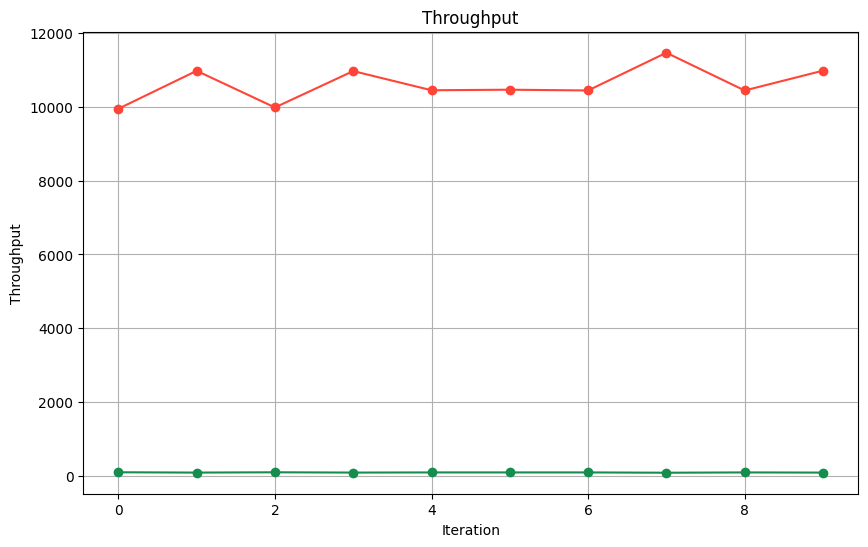

In [413]:
throughput = "[OVERALL] Throughput(ops/sec)"
average_latency = "[INSERT] AverageLatency(us)"

plt.figure(figsize=(10, 6))
plt.plot(mongo_df[throughput], marker='o', color=mongo, linestyle='-', label='Throughput')
plt.plot(mongo_df[average_latency], marker='o', color=redis, linestyle='-', label='Average Latency')
plt.title('Throughput')
plt.xlabel('Iteration')
plt.ylabel('Throughput')
plt.grid(True)
plt.show()

In [414]:
options = ['load_3_10_90', 'load_5_10_90', 'load_3_50_50', 'load_5_50_50', 'run_3_10_90', 'run_5_10_90', 'run_3_50_50',
           'run_5_50_50']

attributes_load = ['[INSERT] AverageLatency(us)']
attributes_run = ['[READ] AverageLatency(us)', '[UPDATE] AverageLatency(us)']
throughput = '[OVERALL] Throughput(ops/sec)'

for option in options:
    pairs = load_dataframe_pairs(option)
    for i, pair in enumerate(pairs, start=1):
        mongo_df, redis_df = pair
        if option.startswith('load'):
            for attribute in attributes_load:
                # display_compared_attribute2(mongo_df, redis_df, attribute, option)
                pass
        else:
            for attribute in attributes_run:
                # display_compared_attribute2(mongo_df, redis_df, attribute, option)
                pass


In [415]:
mongoloaddf: pd.DataFrame = pd.DataFrame()
redisloaddf: pd.DataFrame = pd.DataFrame()
mongorundf: pd.DataFrame = pd.DataFrame()
redisrundf: pd.DataFrame = pd.DataFrame()

mongorundfthr: pd.DataFrame = pd.DataFrame()
redisrundfthr: pd.DataFrame = pd.DataFrame()
mongoloaddfthr: pd.DataFrame = pd.DataFrame()
redisloaddfthr: pd.DataFrame = pd.DataFrame()
for option in options:
    pairs = load_dataframe_pairs(option)
    for i, pair in enumerate(pairs, start=1):
        mongo_df, redis_df = pair
        if option.startswith('load'):
            for attribute in attributes_load:
                mongoloaddf['{option}-{attribute}'.format(option=option, attribute=attribute)] = mongo_df[attribute]
                redisloaddf['{option}-{attribute}'.format(option=option, attribute=attribute)] = redis_df[attribute]
                mongoloaddfthr[
                    '{option}-{attribute}'.format(option=option, attribute='[OVERALL] Throughput(ops/sec)')] = mongo_df[
                    '[OVERALL] Throughput(ops/sec)']
                redisloaddfthr[
                    '{option}-{attribute}'.format(option=option, attribute='[OVERALL] Throughput(ops/sec)')] = redis_df[
                    '[OVERALL] Throughput(ops/sec)']
        else:
            for attribute in attributes_run:
                mongorundf['{option}-{attribute}'.format(option=option, attribute=attribute)] = mongo_df[attribute]
                redisrundf['{option}-{attribute}'.format(option=option, attribute=attribute)] = redis_df[attribute]
                mongorundfthr['{option}-{attribute}'.format(option=option, attribute='[OVERALL] Throughput(ops/sec)')] = \
                    mongo_df['[OVERALL] Throughput(ops/sec)']
                redisrundfthr['{option}-{attribute}'.format(option=option, attribute='[OVERALL] Throughput(ops/sec)')] = \
                    redis_df['[OVERALL] Throughput(ops/sec)']



In [416]:
mongorundfthr

,run_3_10_90-[OVERALL] Throughput(ops/sec),run_5_10_90-[OVERALL] Throughput(ops/sec),run_3_50_50-[OVERALL] Throughput(ops/sec),run_5_50_50-[OVERALL] Throughput(ops/sec)
0,1329.787234,808.407437,660.938533,558.971492
1,1074.113856,574.052813,704.225352,425.350915
2,1066.098081,504.032258,453.926464,575.373993
3,1043.841336,829.187396,711.743772,311.915159
4,1024.590164,669.792364,738.007380,562.746201
5,1076.426265,557.413601,645.161290,431.406385
6,1015.228426,783.699060,382.848392,485.436893
7,1024.590164,739.644970,421.585160,471.031559
8,983.284169,780.031201,430.848772,610.500611
9,1061.571125,819.000819,653.167864,498.504487


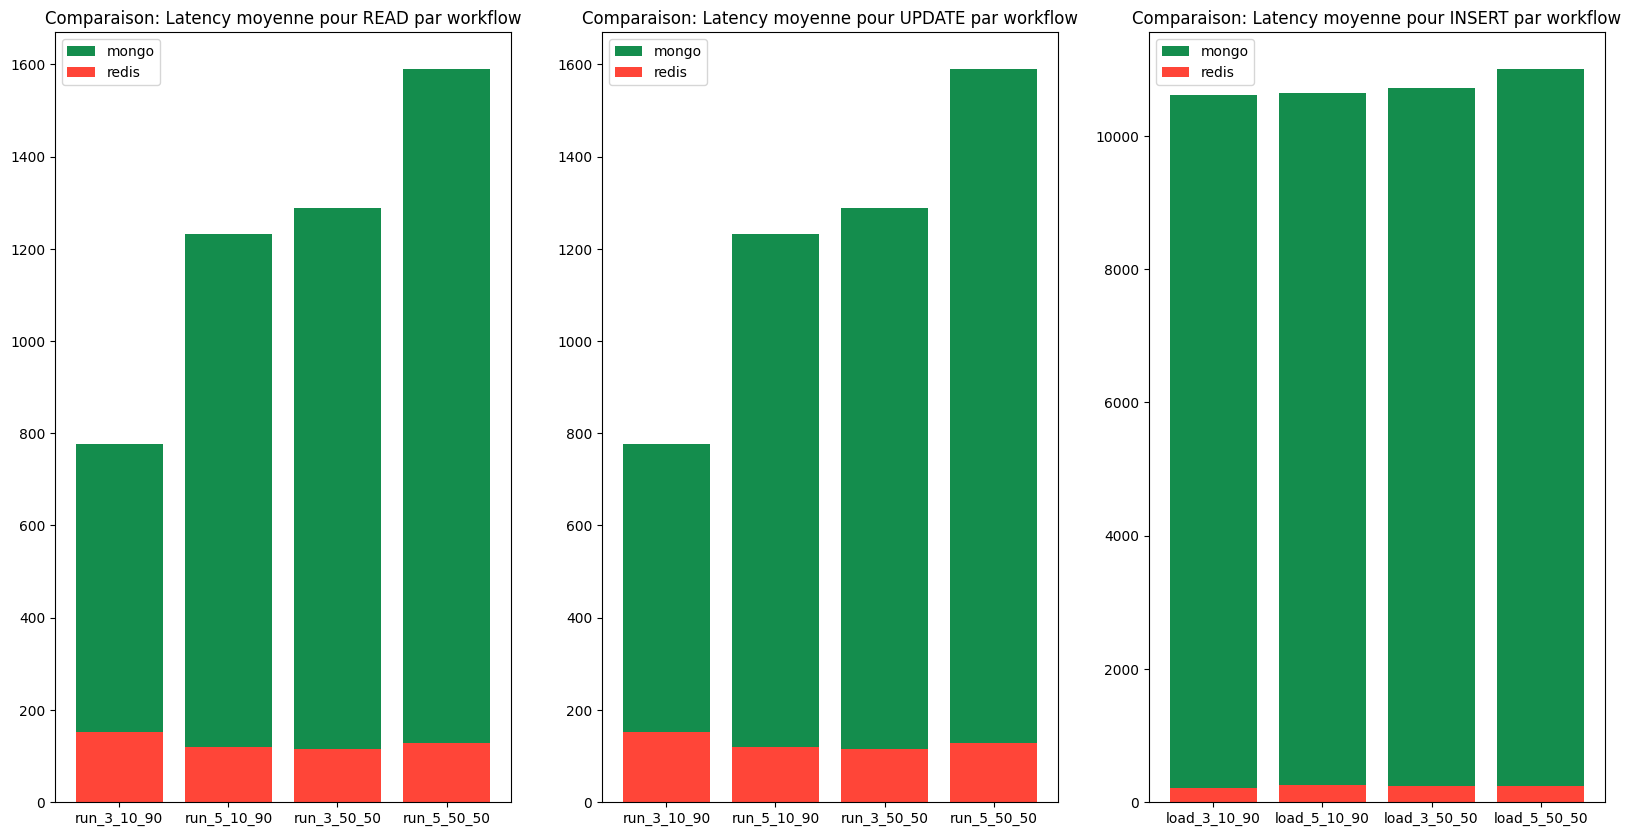

In [417]:
fig, axs = plt.subplots(nrows=1, ncols=3, figsize=(20, 10))  # 2 rows, 2 columns

for i, col in enumerate(attributes_run):
    axs[i].bar(mongorundf.columns.map(lambda x: x.split('-')[0]), height=mongorundf.mean(), label="mongo", color=mongo)
    axs[i].bar(redisrundf.columns.map(lambda x: x.split('-')[0]), height=redisrundf.mean(), label="redis", color=redis)
    axs[i].set_title('Comparaison: ' + translations[col] + ' par workflow')
    axs[i].legend()

for i, col in enumerate(attributes_load):
    axs[2].bar(mongoloaddf.columns.map(lambda x: x.split('-')[0]), height=mongoloaddf.mean(), label="mongo",
               color=mongo)
    axs[2].bar(redisloaddf.columns.map(lambda x: x.split('-')[0]), height=redisloaddf.mean(), label="redis",
               color=redis)
    axs[2].set_title('Comparaison: ' + translations[col] + ' par workflow')
    axs[2].legend()
fig.subplots_adjust(hspace=0.4)
plt.show()

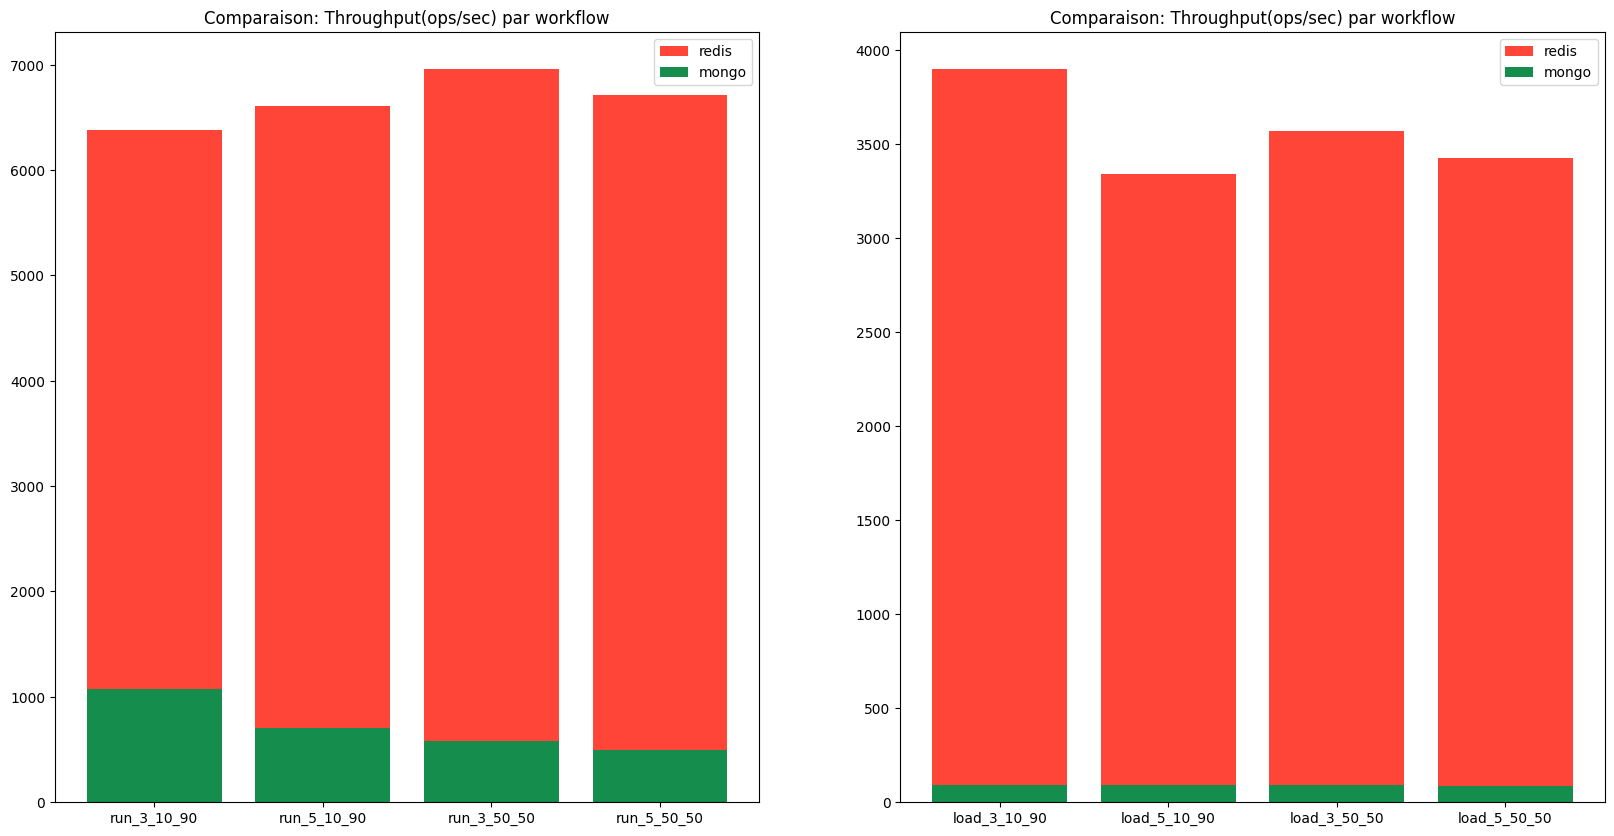

In [418]:
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(20, 10))  # 2 rows, 2 columns
col = throughput

for i, col in enumerate([throughput]):
    axs[i].bar(redisrundfthr.columns.map(lambda x: x.split('-')[0]), height=redisrundfthr.mean(), label="redis",
               color=redis)
    axs[i].bar(mongorundfthr.columns.map(lambda x: x.split('-')[0]), height=mongorundfthr.mean(), label="mongo",
               color=mongo)
    axs[i].set_title('Comparaison:' + col.split(']')[1] + ' par workflow')
    axs[i].legend()

for i, col in enumerate([throughput]):
    axs[i + 1].bar(redisloaddfthr.columns.map(lambda x: x.split('-')[0]), height=redisloaddfthr.mean(), label="redis",
                   color=redis)
    axs[i + 1].bar(mongoloaddfthr.columns.map(lambda x: x.split('-')[0]), height=mongoloaddfthr.mean(), label="mongo",
                   color=mongo)
    axs[i + 1].set_title('Comparaison:' + col.split(']')[1] + ' par workflow')
    axs[i + 1].legend()
fig.subplots_adjust(hspace=0.4)
plt.show()

In [419]:
mongorundf

,run_3_10_90-[READ] AverageLatency(us),run_3_10_90-[UPDATE] AverageLatency(us),run_5_10_90-[READ] AverageLatency(us),run_5_10_90-[UPDATE] AverageLatency(us),run_3_50_50-[READ] AverageLatency(us),run_3_50_50-[UPDATE] AverageLatency(us),run_5_50_50-[READ] AverageLatency(us),run_5_50_50-[UPDATE] AverageLatency(us)
0,786.000000,393.671574,942.097826,828.495595,824.475104,1209.173745,1128.244618,1415.124744
1,752.846154,587.903190,1866.575758,1230.976693,833.090730,1005.464503,1649.377049,2020.449219
2,753.439252,588.334826,1652.287234,1489.395143,1683.055877,1753.623701,1233.717694,1242.714286
3,748.947917,582.148230,908.132653,858.082040,982.795359,930.121673,2428.313492,2605.024194
4,733.045045,632.920135,1225.970588,1060.543430,782.090000,967.582000,1267.649299,1326.756487
5,720.348315,601.160263,1705.968421,1328.385635,944.104925,1075.769231,1434.515337,1451.806262
6,759.306122,624.733925,1037.611650,911.306577,1357.817097,1869.273642,1541.888668,1597.603622
7,683.521008,613.426788,1089.425743,962.911012,1166.275654,1468.644135,1482.127273,1447.403960
8,1087.307692,638.289062,1000.436975,893.700341,1551.460251,1423.318008,1082.268775,1257.471660
9,751.722772,597.103448,883.803738,851.742441,929.088235,1190.248980,1300.127883,1540.529637


In [420]:
redisrundf

,run_3_10_90-[READ] AverageLatency(us),run_3_10_90-[UPDATE] AverageLatency(us),run_5_10_90-[READ] AverageLatency(us),run_5_10_90-[UPDATE] AverageLatency(us),run_3_50_50-[READ] AverageLatency(us),run_3_50_50-[UPDATE] AverageLatency(us),run_5_50_50-[READ] AverageLatency(us),run_5_50_50-[UPDATE] AverageLatency(us)
0,114.857143,85.452328,126.131313,107.392897,62.770492,90.978516,78.862823,114.088531
1,183.446602,137.397993,125.325581,100.897155,131.181818,200.893069,67.718929,117.876310
2,217.442308,161.276786,125.971963,105.780515,75.363107,88.261856,80.151452,128.716216
3,120.980198,86.311457,112.946429,97.970721,65.808943,96.187008,71.493976,116.143426
4,116.173077,93.960938,115.513274,102.774521,76.930279,89.355422,80.279678,108.363817
5,326.722222,182.531868,114.339450,100.663300,74.465753,103.490798,66.451613,113.275794
6,112.350877,85.116253,115.536082,101.910299,83.634766,84.155738,79.604000,102.524000
7,106.679612,81.824972,115.110000,102.636667,66.360465,97.929752,140.167315,260.310700
8,101.184874,81.653802,129.358696,113.376652,77.288000,91.720000,82.375796,112.533081
9,128.060000,97.948889,125.822222,99.346154,163.621677,203.982387,73.607495,112.062880


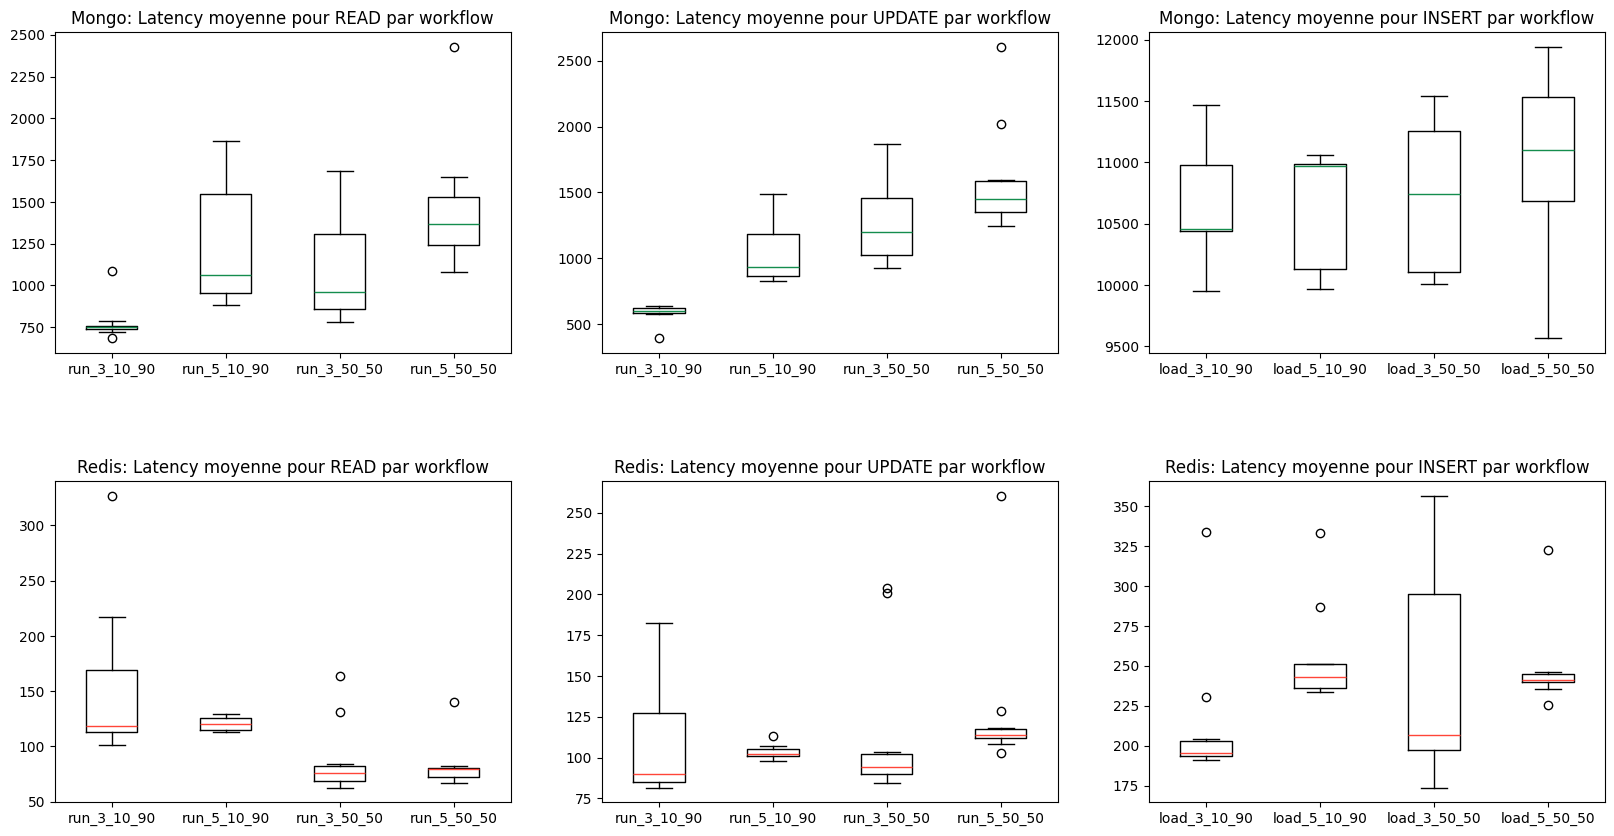

In [421]:
fig, axs = plt.subplots(nrows=2, ncols=3, figsize=(20, 10))  # 2 rows, 2 columns

for i, col in enumerate(attributes_run):
    bp1 = axs[0, i]
    axs[0, i].boxplot(mongorundf.filter(like=col.split(' ')[0]),
                      labels=mongorundf.filter(like=col.split(' ')[0]).columns.map(lambda x: x.split('-')[0]),
                      medianprops={"color": mongo})
    axs[0, i].set_title('Mongo: ' + translations[col] + ' par workflow')

    axs[1, i].boxplot(redisrundf.filter(like=col.split(' ')[0]),
                      labels=redisrundf.filter(like=col.split(' ')[0]).columns.map(lambda x: x.split('-')[0]),
                      medianprops={"color": redis})
    axs[1, i].set_title('Redis: ' + translations[col] + ' par workflow')

for i, col in enumerate(attributes_load):
    axs[0, 2].boxplot(mongoloaddf.filter(like=col.split(' ')[0]),
                      labels=mongoloaddf.filter(like=col.split(' ')[0]).columns.map(lambda x: x.split('-')[0]),
                      medianprops={"color": mongo})
    axs[0, 2].set_title('Mongo: ' + translations[col] + ' par workflow')

    axs[1, 2].boxplot(redisloaddf.filter(like=col.split(' ')[0]),
                      labels=redisloaddf.filter(like=col.split(' ')[0]).columns.map(lambda x: x.split('-')[0]),
                      medianprops={"color": redis})
    axs[1, 2].set_title('Redis: ' + translations[col] + ' par workflow')
fig.subplots_adjust(hspace=0.4)
plt.show()

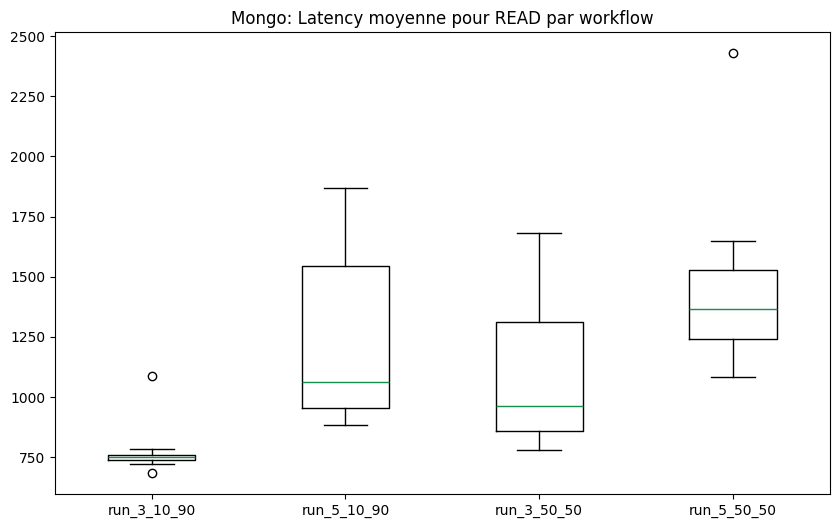

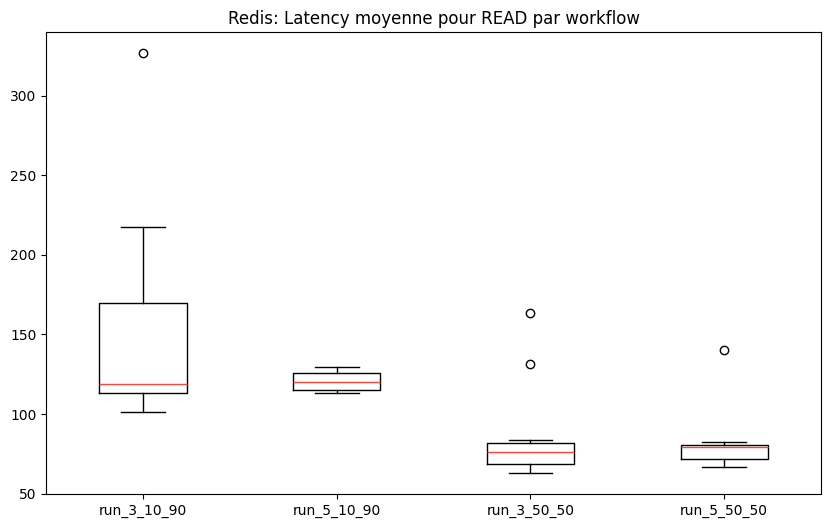

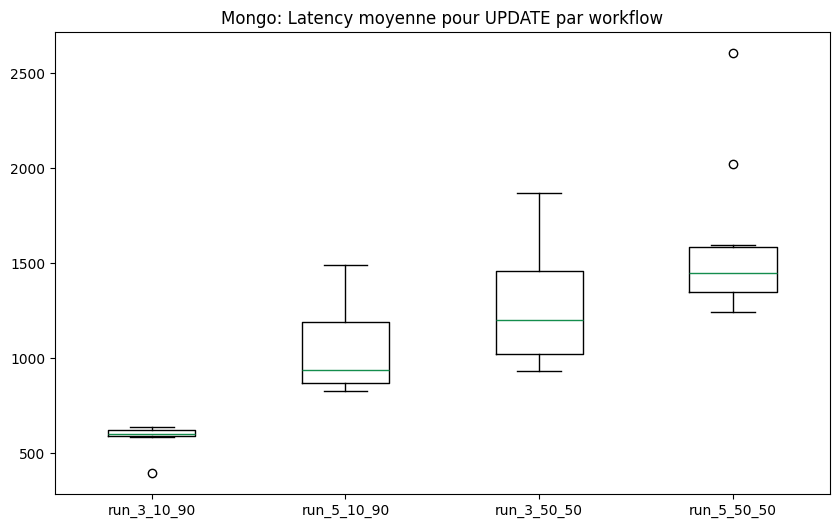

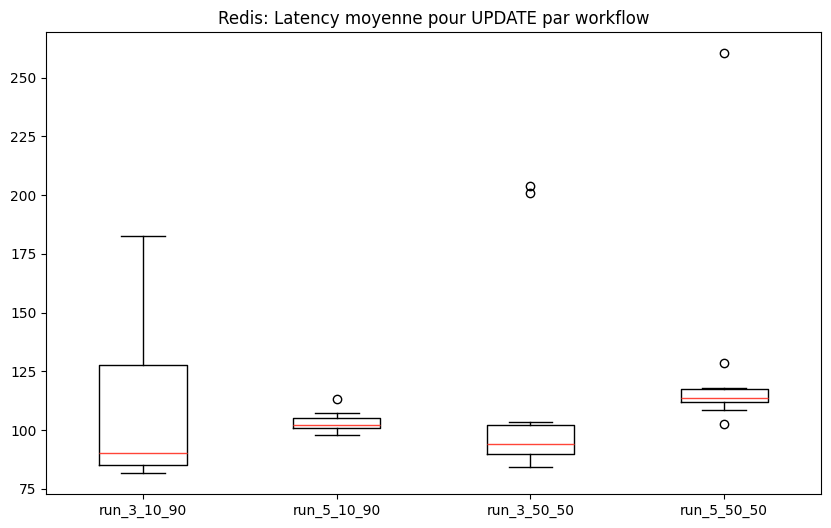

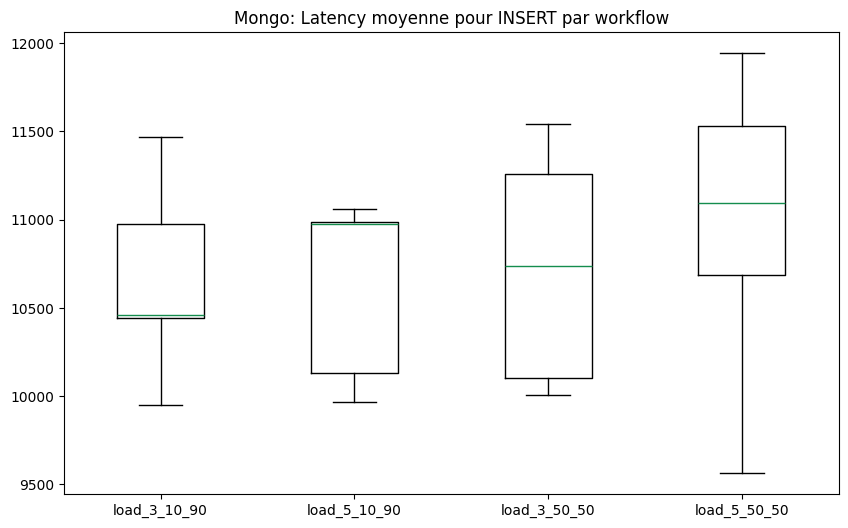

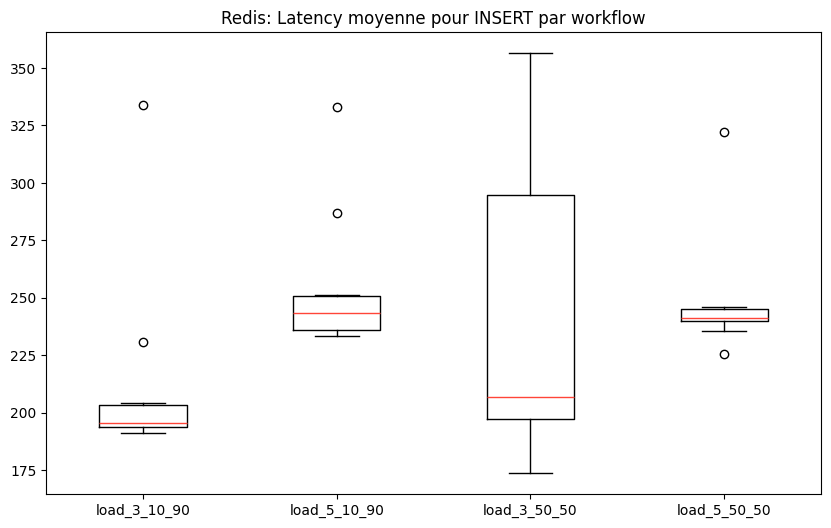

In [422]:
for i, col in enumerate(attributes_run):
    plt.figure(figsize=(10, 6))
    plt.boxplot(mongorundf.filter(like=col.split(' ')[0]),
                labels=mongorundf.filter(like=col.split(' ')[0]).columns.map(lambda x: x.split('-')[0]),
                medianprops={"color": mongo})
    plt.title('Mongo: ' + translations[col] + ' par workflow')
    plt.show()
    plt.figure(figsize=(10, 6))
    plt.boxplot(redisrundf.filter(like=col.split(' ')[0]),
                labels=redisrundf.filter(like=col.split(' ')[0]).columns.map(lambda x: x.split('-')[0]),
                medianprops={"color": redis})

    plt.title('Redis: ' + translations[col] + ' par workflow')
    plt.show()
for i, col in enumerate(attributes_load):
    plt.figure(figsize=(10, 6))
    plt.boxplot(mongoloaddf.filter(like=col.split(' ')[0]),
                labels=mongoloaddf.filter(like=col.split(' ')[0]).columns.map(lambda x: x.split('-')[0]),
                medianprops={"color": mongo})
    plt.title('Mongo: ' + translations[col] + ' par workflow')
    plt.show()
    plt.figure(figsize=(10, 6))
    plt.boxplot(redisloaddf.filter(like=col.split(' ')[0]),
                labels=redisloaddf.filter(like=col.split(' ')[0]).columns.map(lambda x: x.split('-')[0]),
                medianprops={"color": redis})

    plt.title('Redis: ' + translations[col] + ' par workflow')
    plt.show()

In [423]:
attributes_load_thr = ['[OVERALL] Throughput(ops/sec)']
redisrundfthr

,run_3_10_90-[OVERALL] Throughput(ops/sec),run_5_10_90-[OVERALL] Throughput(ops/sec),run_3_50_50-[OVERALL] Throughput(ops/sec),run_5_50_50-[OVERALL] Throughput(ops/sec)
0,7518.796992,6369.426752,8333.333333,7042.253521
1,4761.904762,6711.409396,3816.793893,7246.376812
2,4366.812227,6369.426752,8000.000000,6535.947712
3,7352.941176,6849.315068,8000.000000,7092.198582
4,6993.006993,6622.516556,7692.307692,7092.198582
5,3571.428571,6756.756757,6944.444444,7407.407407
6,6993.006993,6756.756757,7575.757576,7407.407407
7,7751.937984,6711.409396,7936.507937,3164.556962
8,7812.500000,6172.839506,7812.500000,6993.006993
9,6711.409396,6756.756757,3508.771930,7142.857143


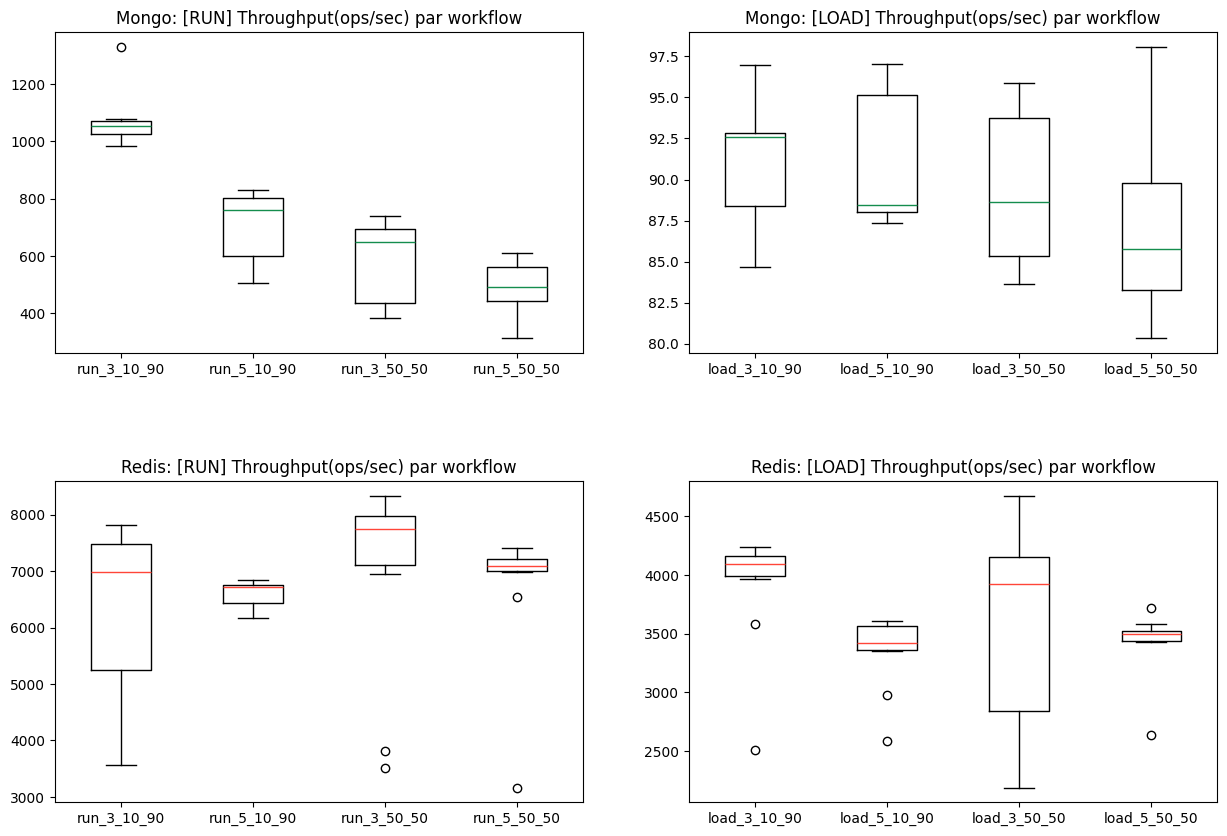

In [424]:
fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(15, 10))  # 2 rows, 2 columns

for i, col in enumerate(attributes_load_thr):
    bp1 = axs[0, 0].boxplot(mongorundfthr.filter(like=col.split(' ')[0]),
                            labels=mongorundfthr.filter(like=col.split(' ')[0]).columns.map(lambda x: x.split('-')[0]),
                            medianprops={"color": mongo})
    axs[0, 0].set_title('Mongo: [RUN]' + col.split(']')[1] + ' par workflow')

    bp2 = axs[1, 0].boxplot(redisrundfthr.filter(like=col.split(' ')[0]),
                            labels=redisrundfthr.filter(like=col.split(' ')[0]).columns.map(lambda x: x.split('-')[0]),
                            medianprops={"color": redis})
    axs[1, 0].set_title('Redis: [RUN]' + col.split(']')[1] + ' par workflow')

for i, col in enumerate(attributes_load_thr):
    bp1 = axs[0, 1].boxplot(mongoloaddfthr.filter(like=col.split(' ')[0]),
                            labels=mongoloaddfthr.filter(like=col.split(' ')[0]).columns.map(lambda x: x.split('-')[0]),
                            medianprops={"color": mongo})
    axs[0, 1].set_title('Mongo: [LOAD]' + col.split(']')[1] + ' par workflow')

    bp2 = axs[1, 1].boxplot(redisloaddfthr.filter(like=col.split(' ')[0]),
                            labels=redisloaddfthr.filter(like=col.split(' ')[0]).columns.map(lambda x: x.split('-')[0]),
                            medianprops={"color": redis})
    axs[1, 1].set_title('Redis: [LOAD]' + col.split(']')[1] + ' par workflow')
fig.subplots_adjust(hspace=0.4)
plt.show()

In [425]:
redisthr = redisrundfthr.stack().reset_index()[0]
mongothr = mongorundfthr.stack().reset_index()[0]


In [426]:
pd.DataFrame(redisthr.describe()).T


,count,mean,std,min,25%,50%,75%,max
0,40.0,6666.374668,1308.210723,3164.556962,6600.874345,6993.006993,7435.254804,8333.333333


In [427]:
pd.DataFrame(mongothr.describe()).T


,count,mean,std,min,25%,50%,75%,max
0,40.0,712.462085,247.936943,311.915159,502.650315,665.365449,867.71159,1329.787234


In [428]:
redisdf = redisrundf.stack().reset_index()[0]
mongodf = mongorundf.stack().reset_index()[0]

In [429]:

pd.DataFrame(redisdf.describe()).T

,count,mean,std,min,25%,50%,75%,max
0,80.0,112.389547,43.289328,62.770492,84.876124,103.132659,118.652282,326.722222


In [430]:

pd.DataFrame(mongodf.describe()).T

,count,mean,std,min,25%,50%,75%,max
0,80.0,1134.557653,428.73706,393.671574,814.856328,1068.15633,1426.11734,2605.024194
